<a href="https://colab.research.google.com/github/Preetirai-tech/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imported the necessary libraries that can be needed for EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Lets read the file as play_df and reviews_df for play_store data and user_reviews data

In [2]:
play_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter /Capstone Projects/EDA/Play Store Data.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter /Capstone Projects/EDA/User Reviews.csv")

In [3]:
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
play_df.shape

(10841, 13)

In [5]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#lets drop nan values from reviews dataframe which have no reviews
reviews_df.drop(reviews_df[reviews_df['Translated_Review'].isna()].index,inplace=True)
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [7]:
#Lets merge two dataframes
combined_df = pd.merge(play_df,reviews_df,how='inner',left_on='App',right_on='App')
combined_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72605 non-null  object 
 1   Category                72605 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72605 non-null  object 
 4   Size                    72605 non-null  object 
 5   Installs                72605 non-null  object 
 6   Type                    72605 non-null  object 
 7   Price                   72605 non-null  object 
 8   Content Rating          72605 non-null  object 
 9   Genres                  72605 non-null  object 
 10  Last Updated            72605 non-null  object 
 11  Current Ver             72605 non-null  object 
 12  Android Ver             72605 non-null  object 
 13  Translated_Review       72605 non-null  object 
 14  Sentiment               72605 non-null

In [9]:
combined_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# Data Preprocessing

In [10]:
# So in the size column we can see we have values with M and K so lets replace them with their equivalent value with respect to k and convert into float
combined_df['Size']=combined_df['Size'].str.replace('M','000')
combined_df['Size']=combined_df['Size'].str.replace('k','')

#apps['size']=apps['size'].str.replace('.','')
combined_df['Size']=combined_df['Size'].replace("Varies with device",np.nan)
combined_df['Size']=combined_df['Size'].astype('float')
combined_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [11]:
# Lets clean the Installs and Price columns as these have +, ',' ,$ present which can be treated as string. Then we will convert the last updated column to date format
combined_df['Installs'] = combined_df['Installs'].str.replace('+','')
combined_df['Installs'] = combined_df['Installs'].str.replace(',','')
combined_df['Installs'] = combined_df['Installs'].astype(int)
combined_df['Reviews'] = combined_df['Reviews'].astype(int)
combined_df['Price'] = combined_df['Price'].str.replace('$','')
combined_df['Price'] = combined_df['Price'].astype(float)
combined_df['Last Updated'] = pd.to_datetime(combined_df['Last Updated'])


In [12]:
combined_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     72605 non-null  object        
 1   Category                72605 non-null  object        
 2   Rating                  72566 non-null  float64       
 3   Reviews                 72605 non-null  int64         
 4   Size                    45046 non-null  float64       
 5   Installs                72605 non-null  int64         
 6   Type                    72605 non-null  object        
 7   Price                   72605 non-null  float64       
 8   Content Rating          72605 non-null  object        
 9   Genres                  72605 non-null  object        
 10  Last Updated            72605 non-null  datetime64[ns]
 11  Current Ver             72605 non-null  object        
 12  Android Ver             72605 non-null  object

In [14]:
# Number of apps per categories
combined_df['Category'].value_counts()

GAME                   19125
FAMILY                  5910
HEALTH_AND_FITNESS      4503
SPORTS                  3504
DATING                  3198
PRODUCTIVITY            3121
TRAVEL_AND_LOCAL        3101
PHOTOGRAPHY             2480
ENTERTAINMENT           2433
BUSINESS                2347
MEDICAL                 2211
NEWS_AND_MAGAZINES      2204
SHOPPING                2026
FINANCE                 2009
COMMUNICATION           1949
TOOLS                   1794
EDUCATION               1694
SOCIAL                  1398
LIFESTYLE               1332
PERSONALIZATION         1312
FOOD_AND_DRINK           846
BOOKS_AND_REFERENCE      815
HOUSE_AND_HOME           697
ART_AND_DESIGN           382
BEAUTY                   338
LIBRARIES_AND_DEMO       333
VIDEO_PLAYERS            331
AUTO_AND_VEHICLES        289
PARENTING                260
WEATHER                  233
MAPS_AND_NAVIGATION      192
EVENTS                   158
COMICS                    80
Name: Category, dtype: int64

Text(0.5, 1.0, 'Number of Apps per cateory')

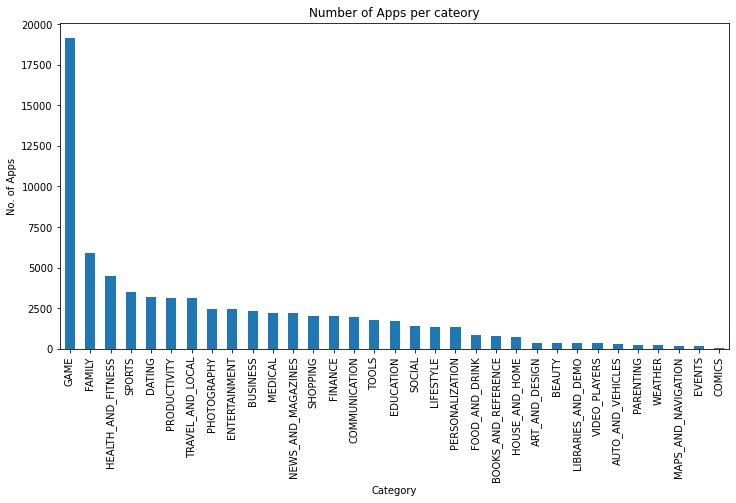

In [15]:
fig = plt.figure(figsize =(12,6))
combined_df['Category'].value_counts().plot(kind='bar')
plt.ylabel('No. of Apps')
plt.xlabel('Category')
plt.title('Number of Apps per cateory')
# plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [16]:
# Average rating for every category
combined_df.groupby('Category').Rating.agg('mean')

Category
ART_AND_DESIGN         4.303141
AUTO_AND_VEHICLES      4.577855
BEAUTY                 4.248817
BOOKS_AND_REFERENCE    4.327853
BUSINESS               4.273157
COMICS                 4.262500
COMMUNICATION          4.226424
DATING                 4.116667
EDUCATION              4.486954
ENTERTAINMENT          4.028607
EVENTS                 4.336076
FAMILY                 4.380017
FINANCE                4.262817
FOOD_AND_DRINK         4.418676
GAME                   4.460444
HEALTH_AND_FITNESS     4.423118
HOUSE_AND_HOME         4.208321
LIBRARIES_AND_DEMO     4.057057
LIFESTYLE              4.126502
MAPS_AND_NAVIGATION    4.323958
MEDICAL                4.163950
NEWS_AND_MAGAZINES     4.177132
PARENTING              4.250769
PERSONALIZATION        4.327439
PHOTOGRAPHY            4.378911
PRODUCTIVITY           4.395867
SHOPPING               4.344965
SOCIAL                 4.212947
SPORTS                 4.275000
TOOLS                  4.271628
TRAVEL_AND_LOCAL       4.293099

In [17]:
# Lowest and hightest rating of each category
combined_df.groupby('Category').agg(min_rating_per_category = ('Rating','min'),max_rating_per_category = ('Rating','max')).reset_index()

,Category,min_rating_per_category,max_rating_per_category
0,ART_AND_DESIGN,3.9,4.7
1,AUTO_AND_VEHICLES,4.2,4.9
2,BEAUTY,3.9,4.6
3,BOOKS_AND_REFERENCE,3.5,4.7
4,BUSINESS,3.8,4.6
5,COMICS,4.2,4.7
6,COMMUNICATION,3.7,4.6
7,DATING,3.3,4.7
8,EDUCATION,3.5,4.7
9,ENTERTAINMENT,3.0,4.6


In [18]:
# Maximum apps installed in each category
max_apps_installed = combined_df.groupby(['Category','App'])['Installs'].max().reset_index()
max_apps_installed[max_apps_installed['Installs'] == max_apps_installed['Installs'].max()]

,Category,App,Installs
90,COMMUNICATION,Gmail,1000000000
94,COMMUNICATION,Hangouts,1000000000
561,NEWS_AND_MAGAZINES,Google News,1000000000
627,PHOTOGRAPHY,Google Photos,1000000000
702,SOCIAL,Facebook,1000000000
708,SOCIAL,Google+,1000000000
781,TOOLS,Google,1000000000
824,TRAVEL_AND_LOCAL,Google Street View,1000000000


In [19]:
# to find out the average rating of the paid apps and free apps and compare them
combined_df.groupby('Type')['Rating'].mean()

Type
Free    4.333644
Paid    4.333376
Name: Rating, dtype: float64

##### The result depicts that the average rating of free and paid apps are very close and yet the average rating of free apps is more . Hence, free apps are performing well